## Importing Libs

In [152]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
import sys 
sys.path.append('/mnt/c/Study/CourseraFin/notebooks_and_codem01_v02/erk')

In [158]:
from dataloader import *
from stats import *
from plots import *
from algorithms import *

## Reading Data

In [32]:
ind_ret =get_ind_returns()

In [33]:
ind_ret.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


let's calculate the market cap of industries. For that, we need to multply every company's stock in every industry by the number of shares. 
We have average size of industry and number of nfirms in every industry.

In [34]:
ind_size = get_ind_size()
ind_firms = get_ind_nfirms()

In [35]:
ind_size.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,6.18,...,350.36,13.60,56.70,35.35,66.91,1.19,46.65,10.82,18.83,24.25
1926-08,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,6.20,...,353.27,14.75,57.74,37.86,67.99,0.90,46.57,11.00,18.88,25.51
1926-09,37.00,8.58,64.03,27.30,14.67,21.18,19.29,26.73,65.53,6.71,...,360.96,15.05,59.61,36.82,71.02,0.95,46.11,10.94,19.67,27.21
1926-10,37.14,8.92,64.42,28.76,14.42,21.23,19.03,26.87,68.47,6.82,...,364.16,15.30,59.52,34.77,70.83,0.88,46.15,10.80,19.36,26.16
1926-11,35.88,8.62,65.08,27.38,15.79,20.14,19.03,26.54,65.06,6.84,...,363.74,14.89,58.74,32.80,68.75,0.74,45.03,10.33,18.35,23.94


In [36]:
ind_firms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-08,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-09,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-10,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-11,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0


## Process the data  

In [39]:
# multiply number of firms by average size of industry
ind_mcap = ind_firms*ind_size

In [40]:
ind_mcap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


let's estimate weight of each industry by their total market capatization

In [42]:
total_mktcap = ind_mcap.sum(axis="columns")

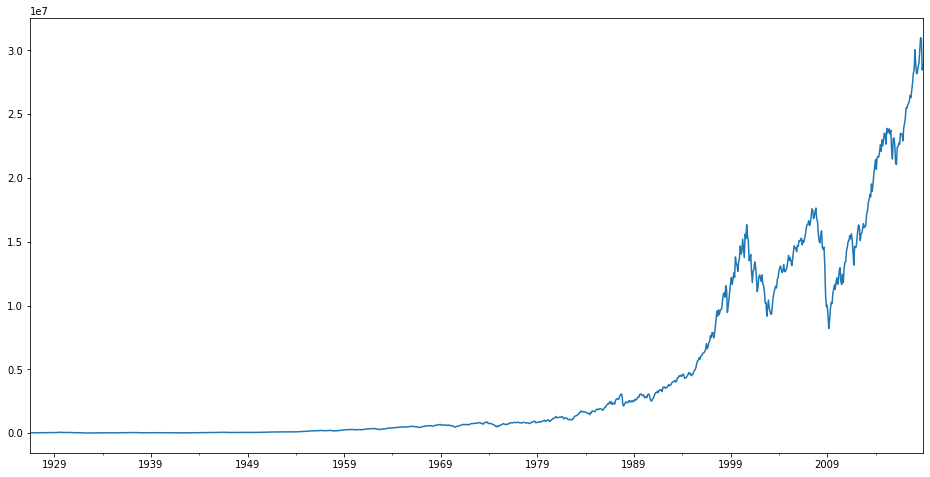

In [46]:
_=total_mktcap.plot(figsize=(16,8))

In [52]:
ind_wghts = ind_mcap.divide(total_mktcap,axis='rows')

In [53]:
ind_wghts.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [56]:
ind_wghts["1926"].sum(axis='columns')

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

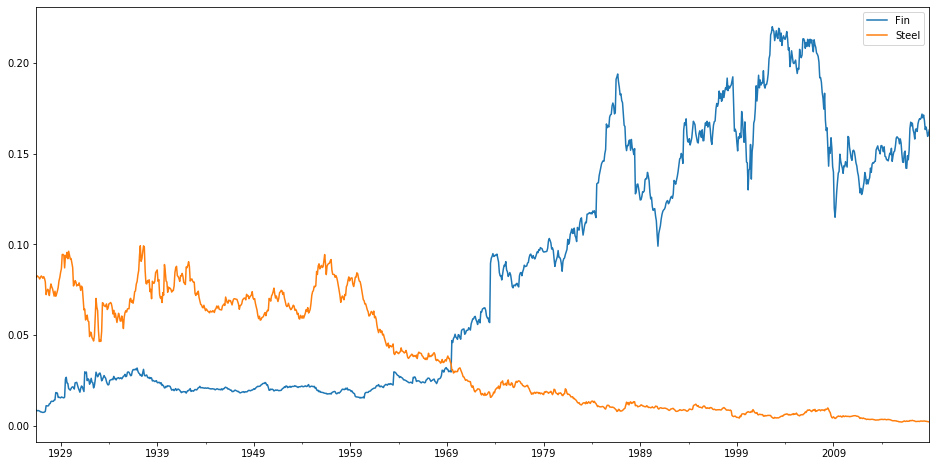

In [58]:
ind_wghts[['Fin','Steel']].plot(figsize=(16,8))

In [59]:
total_mkt_ret = (ind_ret*ind_wghts).sum(axis="columns")

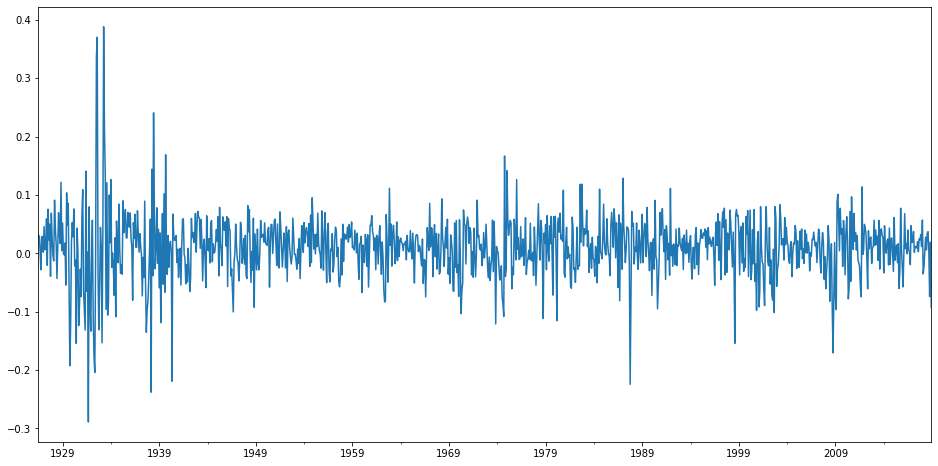

In [75]:
total_mkt_ret.plot(figsize=(16,8))

In [72]:
mkt_index = drawdown(total_mkt_ret)["Wealth"]

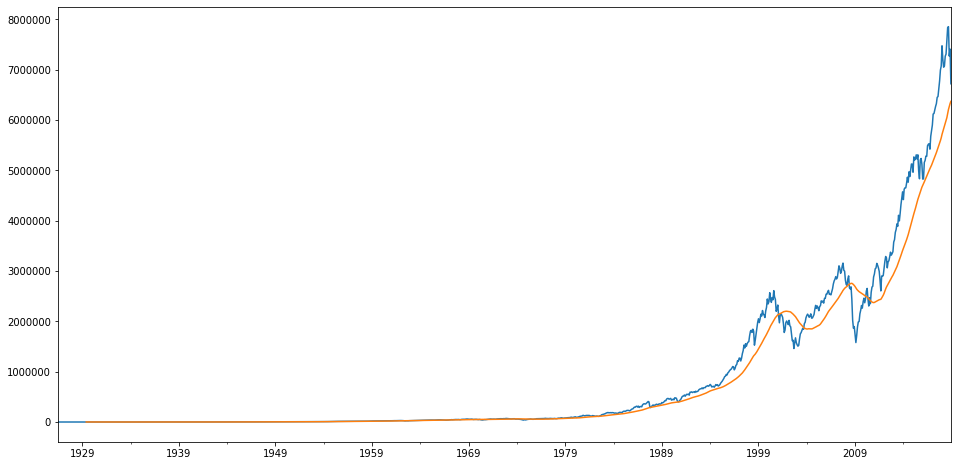

In [77]:
_=mkt_index.plot(figsize=(16,8))
mkt_index.rolling(window=36).mean().plot()

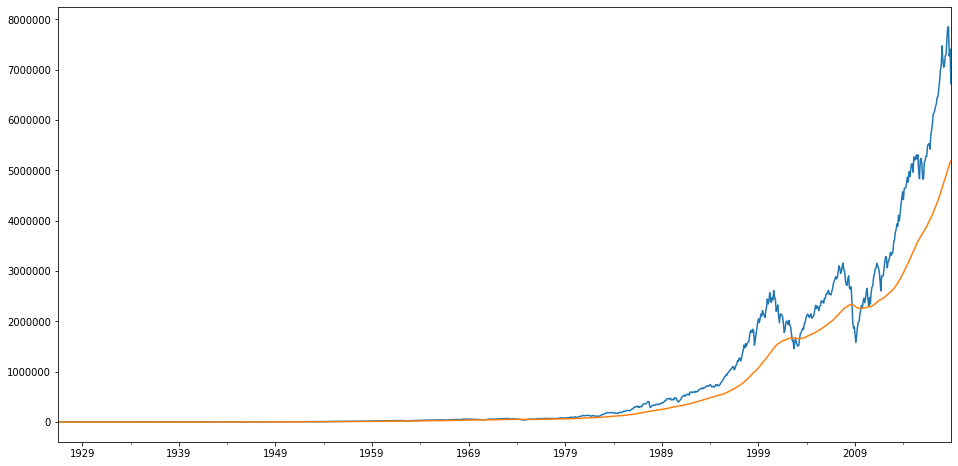

In [84]:
plot_moving_average(mkt_index,'exp',alpha=0.02)

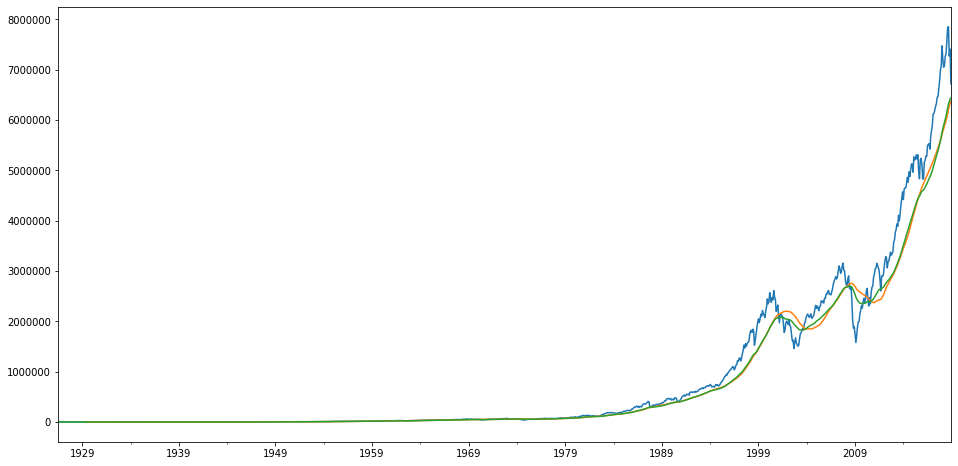

In [88]:
plot_moving_average(mkt_index,'both',alpha=0.05)

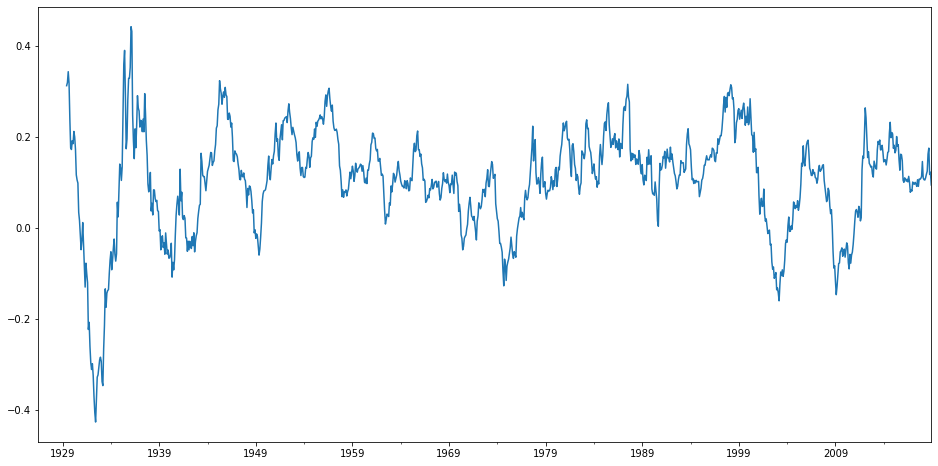

In [96]:
total_mkt26trail=total_mkt_ret.rolling(window=36).aggregate(annualize_rets,periods_per_year=12)


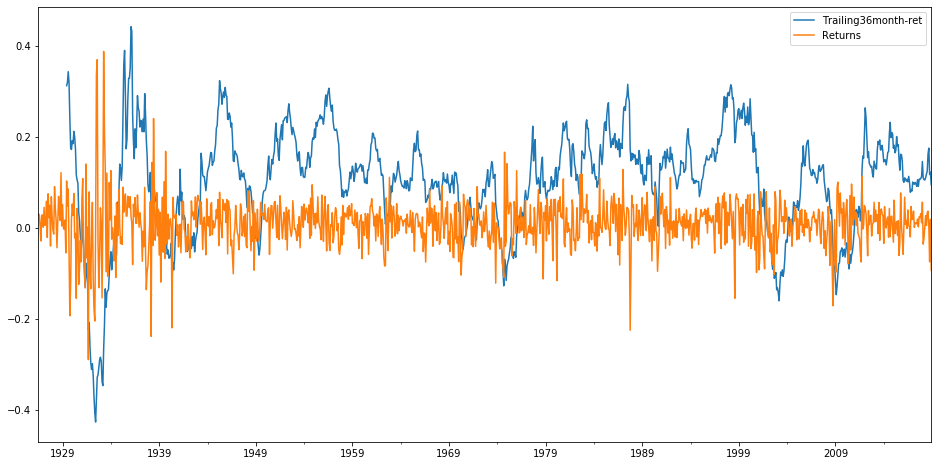

In [99]:
total_mkt26trail.plot(figsize=(16,8),label='Trailing36month-ret',legend=True)
total_mkt_ret.plot(label='Returns',legend=True)

## Limits of Diversification

In [100]:
ts_corr = ind_ret.rolling(window=36).corr()

In [103]:
ts_corr.index.names = ['date','industry']

In [104]:
ts_corr

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
1926-07 Food           NaN       NaN       NaN       NaN       NaN       NaN   
        Beer           NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke          NaN       NaN       NaN       NaN       NaN       NaN   
        Games          NaN       NaN       NaN       NaN       NaN       NaN   
        Books          NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
1926-07 Food           NaN       NaN       NaN       NaN  ...       NaN   
        Beer           NaN       NaN       NaN       NaN  ...       NaN   
        Smoke          NaN       NaN       NaN       NaN  ...       NaN   
        Games          NaN       NaN       NaN       NaN  ...       NaN   
        Books          NaN       NaN       NaN       NaN  ...       NaN   
...                    ...       ...       ...       ...  ...       ...   
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
1926-07 Food           NaN       NaN       NaN       NaN       NaN       NaN   
        Beer           NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke          NaN       NaN       NaN       NaN       NaN       NaN   
        Games          NaN       NaN       NaN       NaN       NaN       NaN   
        Books          NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
1926-07 Food           NaN       NaN       NaN  
        Beer           NaN       NaN       NaN  
        Smoke          NaN       NaN       NaN  
        Games          NaN       NaN       NaN  
        Books          NaN       NaN       NaN  
...                    ...       ...       ...  
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[33300 rows x 30 columns]

In [107]:
ts_corr.groupby(level='date').mean() # his calculates the avreage correlation by industry for last 36 means

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
1926-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,0.348576,0.274964,0.179734,0.365263,0.510397,0.322396,0.242722,0.485248,0.555274,0.469549,...,0.462340,0.433123,0.392543,0.566703,0.478305,0.548324,0.445921,0.388003,0.462480,0.492704
2018-09,0.336157,0.296735,0.182318,0.328738,0.496079,0.311999,0.248625,0.456209,0.535313,0.449269,...,0.445093,0.419965,0.379926,0.556357,0.476718,0.530988,0.432983,0.383579,0.448070,0.479397
2018-10,0.256802,0.254662,0.022350,0.362489,0.480606,0.264912,0.347460,0.476683,0.549703,0.487222,...,0.388607,0.435676,0.405042,0.566886,0.503883,0.551723,0.484910,0.367261,0.458837,0.489058


In [108]:
ind_corr_tr36 = ts_corr.groupby(level='date').apply(lambda corrmat: corrmat.values.mean())

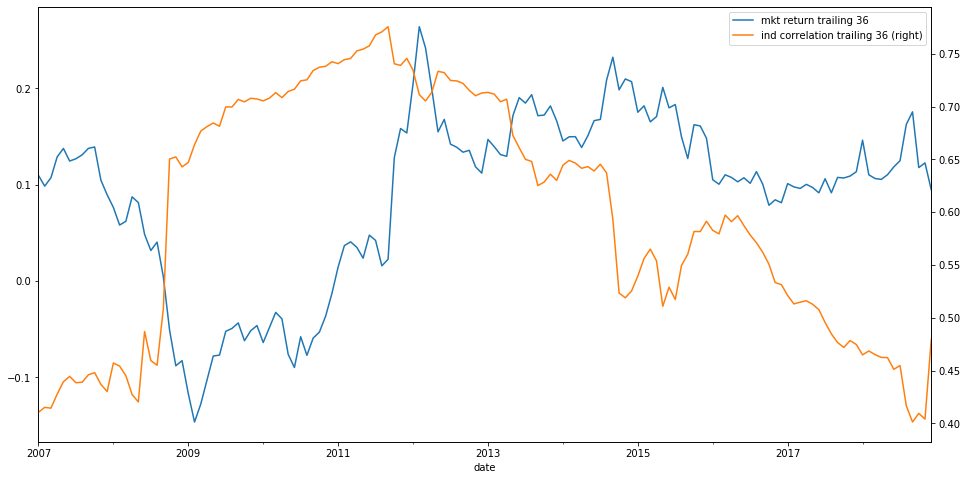

In [115]:
total_mkt26trail["2007":].plot(figsize=(16,8),label='mkt return trailing 36',legend=True)
ind_corr_tr36["2007":].plot(label='ind correlation trailing 36',legend=True,secondary_y=True)

In [120]:
print(f"Correlation between trailing market return and trailing industries average correlation: -> {total_mkt26trail.corr(ind_corr_tr36)}")

Correlation between trailing market return and trailing industries average correlation: -> -0.28010065062884126


Our analysis so far states that markets return tend to have -ve correlation w.r.t industries return correlation. In other words, when the markets tank, our industries tend to move together, basically limiting the capacbility of diversification which relies on the fact that -ve correlation among industries tends to reduce variation. 

## CPPI

Insurance -- balancing our allocations between risky assets and risk free assets. 
Typical scenario - we have a portfolio and we know its return profile, statistics like drawdown, variation over time, sharpe ratio etc.
We also have a risk free asset. We need to learn how much to allocate to risky asset and how much to risk free asset. We also have an absolute cap on how much
we want to lose. 
So, let's say we have wealth,$w_{0}$, and don't want to lose more than $l$%. So, in that case, we have a cushion,$c$ equals $w_{0}*l$. We also operate with a multiplier, $m$. In that case, we invest our wealth in risky assets as $p_{a}=m*w*l$, and in risk free assets, $p_{free}=1-m*w*l$. We also, continually monitor our wealth and update our allocations as per available cushion. But our floor, $f=w_{0}*(1-l)$ stays fixed
in addition, it is always better to recalculate your floor if you portfolio goes up. Also, it is a better idea to follow the max cap of return as well

In [124]:
risky_r = ind_ret['2000':][['Steel','Fin','Beer']]
safe_r = pd.DataFrame().reindex_like(risky_r)

In [126]:
safe_r[:] = 0.03/12

In [122]:
# Implemengting CPPI 
start_wealth = 1000
floor = 0.8

1. Compute cushion = (Wealth - floor)
2. Compute allocation for risky asset and safe asset
3. Compute the asset value based on return 

In [131]:
n_points = risky_r.shape[0]
start_wealth = 1000
floor = 0.8 
c = start_wealth*(1-floor)
m = 3
floor_value = wealth*floor

In [132]:
wealth_history = pd.DataFrame().reindex_like(risky_r) # history of account values
cushion_history = pd.DataFrame().reindex_like(risky_r) # history of cushion
risky_w_history = pd.DataFrame().reindex_like(risky_r) # history of crisky weights

In [134]:
account_value = 1000
floor_value = floor*account_value
for n in range(n_points):
    cushion = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w,1)
    risky_w = np.maximum(risky_w,0)
    safe_w = 1-risky_w
    tot_r = risky_r.iloc[n]*risky_w + safe_w*safe_r.iloc[n]
    account_value = (1+tot_r)*account_value
    wealth_history.iloc[n]=account_value
    cushion_history.iloc[n]=cushion
    risky_w_history.iloc[n]=risky_w

In [138]:
all_risky_wealth = 1000*(risky_r+1).cumprod()

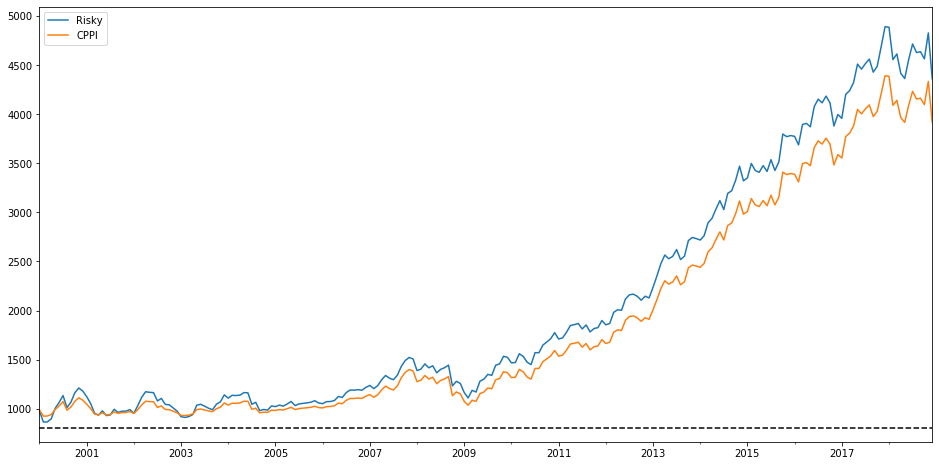

In [149]:
ax=all_risky_wealth["Beer"].plot(figsize=(16,8),label='Risky',legend=True)
wealth_history["Beer"].plot(label='CPPI',legend=True,ax=ax)
ax.axhline(floor_value,c='k',linestyle='--')

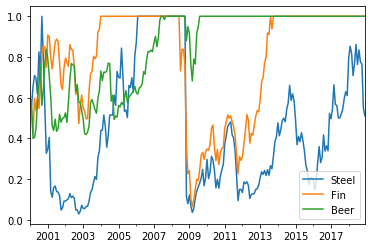

In [150]:
risky_w_history.plot()

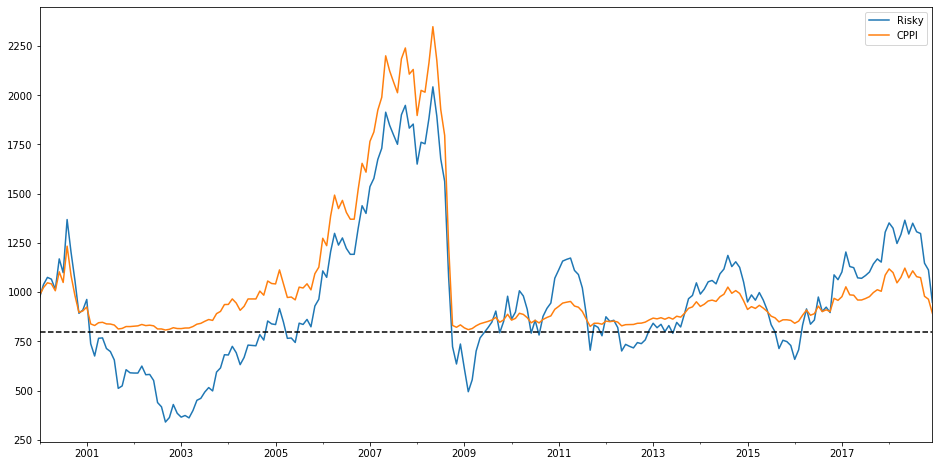

In [151]:
ax=all_risky_wealth["Steel"].plot(figsize=(16,8),label='Risky',legend=True)
wealth_history["Steel"].plot(label='CPPI',legend=True,ax=ax)
ax.axhline(floor_value,c='k',linestyle='--')

In [155]:
summary_stats(risky_r)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.002790,0.312368,-0.326334,4.144381,0.150139,0.006139,-0.102567,-0.758017
Fin,0.055166,0.192909,-0.533218,4.995534,0.091224,-0.000094,0.126718,-0.718465
Beer,0.080598,0.138925,-0.493545,4.173881,0.063015,-0.001866,0.354314,-0.271368


In [159]:
backtest_results = run_cppi(risky_r)

In [164]:
summary_stats(backtest_results['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.005167,0.174180,-1.995143,17.110190,0.091995,0.006710,-0.196750,-0.655198
Fin,0.040894,0.131678,-0.946504,6.051414,0.065535,0.000420,0.080352,-0.549673
Beer,0.075544,0.115462,-0.669250,4.760879,0.052923,-0.001118,0.383772,-0.259582
